# Book Similarity Application
This notebook shows how to use the book similarity application. It uses cosine similarity and genre preferences to recommend books.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from data_processing import get_user_preferences, calculate_similarity
from api import get_user_book_summaries, get_other_book_data

## Load Dataset
Loading the books data from a CSV file into a Pandas DataFrame.

In [3]:
df = pd.read_csv("books.csv")

## User Preferences
Enter your favorite books, favorite genre, and the genre you're looking to explore.

In [4]:
isbn_list, genre, genre_to_read = get_user_preferences(df)

Enter the titles of your favorite books (no punctuation), separated by commas:  harry potter, something else
Enter your favorite genre:  fantasy
Enter the genre you're looking to read:  action


## Fetch Summaries and Calculate Similarity

In [5]:
print(f"\nSearching for similarities of {isbn_list} in {genre_to_read} and {genre}...\n")

user_summaries, book_names = get_user_book_summaries(isbn_list)
other_book_data = get_other_book_data(genre, genre_to_read, book_names)

similarities = calculate_similarity(user_summaries, other_book_data)

most_similar_books = np.argsort(similarities)[-3:][::-1]
print("Based on genres and cosine similarity, the recommended books are:\n")

for index in most_similar_books:
    book = other_book_data[index]
    print(f"Title: {book["title"]}\n")
    print(f"Summary: {book["summary"]}\n")


Searching for similarities of ['0439785960', '0747584664', '0007177844'] in Action and Fantasy...

Based on genres and cosine similarity, the recommended books are:

Title: The Lethal Target

Summary: Get ready for a roller coaster ride as renegades Jake and Lauren take on some big, bad Russians in the hunt for a book from the Order of Malichea that could prove to be the most deadly global weapon ever . . . An action-packed sleuth thriller for fans of Alex Scarrow and Robert Muchamore

Title: Action

Summary: No summary available



## Visualize Similarities
Visualizing the similarity scores of the recommended books.

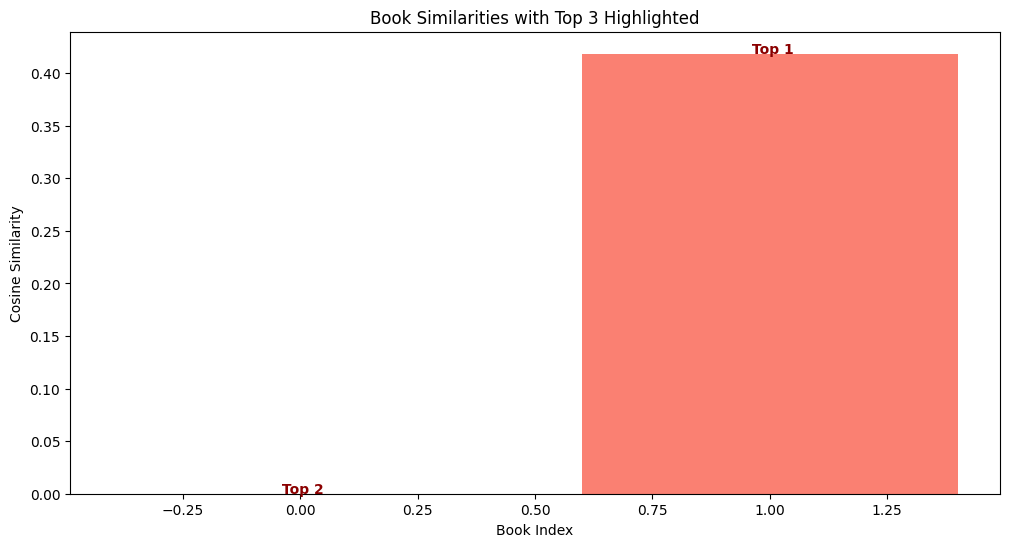

In [6]:
plt.figure(figsize=(12, 6))

bar_colors = ['skyblue' if i not in most_similar_books else 'salmon' for i in range(len(similarities))]

plt.bar(range(len(similarities)), similarities, color=bar_colors)

plt.xlabel('Book Index')
plt.ylabel('Cosine Similarity')
plt.title('Book Similarities with Top 3 Highlighted')

for index in most_similar_books:
    plt.text(x=index, y=similarities[index], s=f' Top {np.where(most_similar_books==index)[0][0]+1}', 
             color='darkred', fontweight='bold', ha='center')

plt.show()